In [1]:
import pandas as pd
import re

In [2]:
df=pd.read_csv('final_reviews.csv')
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5
1,Enjoy while it lasts,This is the second time I am writing this revi...,2
2,Good,1. Quite good look2. Better noise cancellation...,4
3,not great,its a good set of ear buds but1. the quality o...,1
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5


In [5]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
 
blob = TextBlob("The movie was excellent!", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7318278242290406, p_neg=0.26817217577095936)

In [10]:
df['Reviews'][100]

"One the earbuds stopped working after few weeks. Went to Service Center to get it repaired/replaced. Got to know that the Service Center in Noida is running a fraud in which they ask me 500 rupees to replace the product which shouldn't be the case legally. And then made me wait a month to give me back the same faulty product that I gave them.Really disappointed in the Customer Support of Boat. Have mailed them but honestly would think twice before buying boat products in future. Heard from lots of Noida that they faced same fraud and boat is simply doing nothing to save their user base in the city."

In [11]:
df['Rating'][100]

1

In [12]:
blob = TextBlob("One the earbuds stopped working after few weeks. Went to Service Center to get it repaired/replaced. Got to know that the Service Center in Noida is running a fraud in which they ask me 500 rupees to replace the product which shouldn't be the case legally. And then made me wait a month to give me back the same faulty product that I gave them.Really disappointed in the Customer Support of Boat. Have mailed them but honestly would think twice before buying boat products in future. Heard from lots of Noida that they faced same fraud and boat is simply doing nothing to save their user base in the city.", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='neg', p_pos=0.27608027733490187, p_neg=0.7239197226650905)

In [54]:
# label=[]
# p_pos=[]
# p_neg=[]

# def extract(review):
  
#   blob = TextBlob(review, analyzer=NaiveBayesAnalyzer())
#   label.append(blob.sentiment[0])
#   p_pos.append(blob.sentiment[1])
#   p_neg.append(blob.sentiment[2])

In [55]:
# df_demo=pd.DataFrame()

In [56]:
# df_demo['rev']=df['Reviews'][0:10]

In [7]:
df.head(10)

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5
1,Enjoy while it lasts,This is the second time I am writing this revi...,2
2,Good,1. Quite good look2. Better noise cancellation...,4
3,not great,its a good set of ear buds but1. the quality o...,1
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5
5,Some unwanted noise from the left ear bud.,I received the product with some defect. The l...,1
6,Amazon deleting my review.,"Boat AirDopes, have by far been the most champ...",1
7,Poor quality product,Worst product plz don't buy it you will regret...,1
8,Too much price for these not poor pair of Earb...,Boat is an Indian Company but all the products...,1
9,Below average,The sound quality is really really good.And th...,2


In [23]:
# extract("i am happy about the product, the product is very good")

In [9]:
def data_clean(text):
  if text=='The media could not be loaded.':
    return " "
  else:
    return text

In [10]:
df['Reviews']=df['Reviews'].apply(data_clean)
df.fillna('',inplace=True)

In [11]:
df.shape

(4680, 3)

In [12]:
df.isna().sum()

Review_Title    0
Reviews         0
Rating          0
dtype: int64

In [13]:
df['text']=df["Review_Title"]+' '+df['Reviews']

In [14]:
df.head()

,Review_Title,Reviews,Rating,text
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5,AWESOME...IN LOVE WITH IT ! Really impressed w...
1,Enjoy while it lasts,This is the second time I am writing this revi...,2,Enjoy while it lasts This is the second time I...
2,Good,1. Quite good look2. Better noise cancellation...,4,Good 1. Quite good look2. Better noise cancell...
3,not great,its a good set of ear buds but1. the quality o...,1,not great its a good set of ear buds but1. the...
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5,Best buds in the budget with Type C I have bee...


In [ ]:
polarity=[]
def extract(review)
  blob = TextBlob(review)
  polarity.append(blob.sentiment[0])

In [ ]:
df['text'].apply(extract)

In [32]:
len(polarity)

4680

In [33]:
df['polarity']=pd.Series(polarity)

In [34]:
df.head()

,Review_Title,Reviews,Rating,text,polarity
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5,AWESOME...IN LOVE WITH IT ! Really impressed w...,0.542262
1,Enjoy while it lasts,This is the second time I am writing this revi...,2,Enjoy while it lasts This is the second time I...,0.123254
2,Good,1. Quite good look2. Better noise cancellation...,4,Good 1. Quite good look2. Better noise cancell...,0.439286
3,not great,its a good set of ear buds but1. the quality o...,1,not great its a good set of ear buds but1. the...,-0.021154
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5,Best buds in the budget with Type C I have bee...,0.205324


In [35]:
df=df[['text','polarity']]

In [36]:
df.head()

,text,polarity
0,AWESOME...IN LOVE WITH IT ! Really impressed w...,0.542262
1,Enjoy while it lasts This is the second time I...,0.123254
2,Good 1. Quite good look2. Better noise cancell...,0.439286
3,not great its a good set of ear buds but1. the...,-0.021154
4,Best buds in the budget with Type C I have bee...,0.205324


In [37]:
def classification(value):
  if value>0:
    return 1
  else:
    return 0

In [38]:
df['label']=df['polarity'].apply(classification)

In [94]:
df.head()

,text,polarity,label
0,AWESOME...IN LOVE WITH IT ! Really impressed w...,0.542262,1
1,Enjoy while it lasts This is the second time I...,0.123254,1
2,Good 1. Quite good look2. Better noise cancell...,0.439286,1
3,not great its a good set of ear buds but1. the...,-0.021154,0
4,Best buds in the budget with Type C I have bee...,0.205324,1


In [39]:
df['label'].value_counts()

1    3551
0    1129
Name: label, dtype: int64

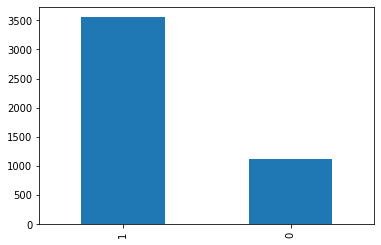

In [40]:
df['label'].value_counts().plot(kind='bar')

In [65]:
df['label'].value_counts()

1    3551
0    1129
Name: label, dtype: int64

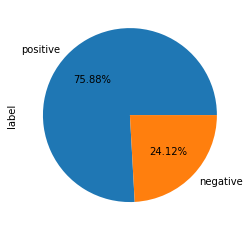

In [64]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=['positive','negative']);

In [45]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  # text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = [port_stem.stem(word) for word in text]
  text = ' '.join(text)
  return text

In [47]:
x=df['text'].apply(text_processing)
y=df['label']

In [48]:
tf=TfidfVectorizer(max_features=3000)

x=tf.fit_transform(df['text']).toarray()
y=df['label'].values

In [49]:
x.shape,y.shape

((4680, 3000), (4680,))

In [50]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x, y = ros.fit_resample(x, y)

In [35]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# x, y = rus.fit_resample(x, y)

In [51]:
x.shape,y.shape

((7102, 3000), (7102,))

In [56]:
df_counts=pd.Series(y)

In [63]:
df_counts.value_counts()

1    3551
0    3551
dtype: int64

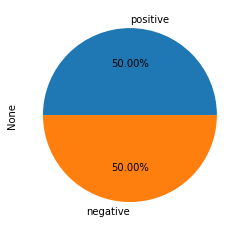

In [62]:
df_counts.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['positive','negative']);

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier( random_state=2)
abc = AdaBoostClassifier(random_state=2)
bc = BaggingClassifier(random_state=2)
etc = ExtraTreesClassifier(random_state=2)
gbdt = GradientBoostingClassifier(random_state=2)
xgb = XGBClassifier(random_state=2)

clfs = {
    'SVC' : svc,
    'KNeighborsClassifier' : knc, 
    'MultinomialNB': mnb, 
    'DecisionTreeClassifier': dtc, 
    'LogisticRegression': lrc, 
    'RandomForestClassifier': rfc, 
    'AdaBoostClassifier': abc, 
    'BaggingClassifier': bc, 
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier':xgb
}

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_test_pred=clf.predict(X_train)
    y_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train,y_test_pred)
    test_accuracy = accuracy_score(y_test,y_pred)
    
    
    return train_accuracy,test_accuracy

In [71]:
train_accuracy_scores = []
test_accuracy_scores = []

for name,clf in clfs.items():
    
    train_current_accuracy,test_current_accuracy = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    train_accuracy_scores.append(train_current_accuracy)
    test_accuracy_scores.append(test_current_accuracy)

In [72]:
len(train_accuracy_scores)

11

In [73]:
len(test_accuracy_scores)

11

In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Train_Accuracy':train_accuracy_scores,'Test_Accuracy':test_accuracy_scores}).sort_values('Test_Accuracy',ascending=False)
performance_df

,Algorithm,Train_Accuracy,Test_Accuracy
8,ExtraTreesClassifier,1.000000,0.966221
0,SVC,0.997712,0.960591
5,RandomForestClassifier,1.000000,0.959184
3,DecisionTreeClassifier,1.000000,0.932442
7,BaggingClassifier,0.993487,0.932442
4,LogisticRegression,0.934167,0.916960
9,GradientBoostingClassifier,0.917620,0.895144
10,XGBClassifier,0.911987,0.893737
6,AdaBoostClassifier,0.891744,0.881070
2,MultinomialNB,0.866925,0.838846


In [141]:
from sklearn.metrics import classification_report
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
 
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       732
           1       0.96      0.96      0.96       689

    accuracy                           0.96      1421
   macro avg       0.96      0.96      0.96      1421
weighted avg       0.96      0.96      0.96      1421



In [156]:
import pickle

pickle.dump(model,open('extra_tree_model.pkl','wb'))

In [157]:
pickle.dump(tf,open('vectorizer.pkl','wb'))

In [142]:
model.predict(x_test[11].reshape(1,-1))

array([1])

In [143]:
y_test[11]

1

In [144]:
model.predict_proba(x_test[11].reshape(1,-1))

array([[0.1, 0.9]])

In [145]:
title="Awesome product"
review='The product is good'

In [146]:
review = title + ' ' + review

In [147]:
review

'Awesome product The product is good'

In [149]:
transformed_review = text_processing(review)
transformed_review

'awesom product the product is good'

In [150]:
vector_ip = tf.transform([transformed_review])


In [151]:
res = model.predict(vector_ip)[0]

In [152]:
res

1

In [153]:
m_prob = model.predict_proba(vector_ip)
m_prob

array([[0.2, 0.8]])

In [154]:
import numpy as np

In [155]:
    if res == 1:
        print('The Review is positive' + ' ' + '(' + str(np.round(m_prob[0][1], 2)) + ')')
    else:
        print('The review is negative' + ' ' + '(' + str(np.round(m_prob[0][0], 2)) + ')')

The Review is positive (0.8)
